In [14]:
import pandas as pd
import numpy as np
import math as mt
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import linregress
netflix = pd.read_csv("netflix_titles.csv")

<AxesSubplot:xlabel='type', ylabel='count'>

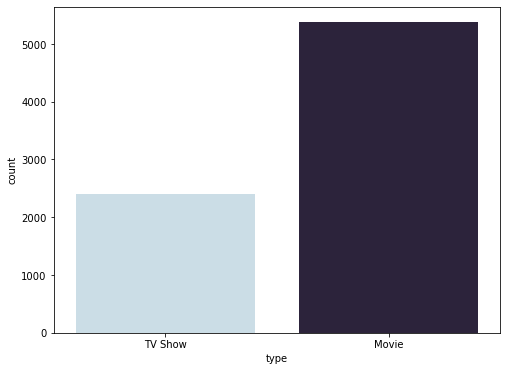

In [15]:
plt.figure(figsize = (8,6))
sns.countplot(x="type", data=netflix, palette="ch:s=.25,rot=-.25")

#### Retiramos o tipo filme e deixei so o tipo series, para  que nesta aba possamos trabalhar so com as series da netflix.

In [16]:
netflix_series = netflix.loc[netflix["type"] == "TV Show"]
netflix_series

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


#### Representação do ano de lançamento de series, que estão presentes no catalogo da netflix

In [17]:
print(list(set(netflix_series.release_year)))

[1925, 1946, 1963, 1967, 1968, 1972, 1974, 1977, 1979, 1981, 1985, 1986, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [18]:
x = pd.DataFrame(netflix_series, columns= ["release_year"])
date_series = x.pivot_table(index=["release_year"], aggfunc='size')
date_series

release_year
1925      1
1946      1
1963      1
1967      1
1968      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      2
1993      4
1994      1
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      4
2002      6
2003      9
2004      9
2005     12
2006     13
2007     13
2008     23
2009     34
2010     37
2011     39
2012     61
2013     65
2014     90
2015    159
2016    240
2017    268
2018    387
2019    414
2020    457
2021     19
dtype: int64

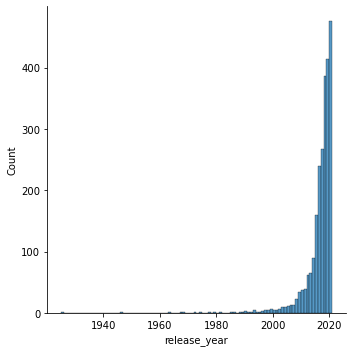

In [19]:
sns.displot(netflix_series, x="release_year",binwidth=1)

#### Limpamos a coluna date_added para pegar so o ano, para que com isso nos pudéssemos fazer uma representação de quantas series foram adicionadas na netflix em determinado ano.

In [20]:
non_tbd_dates = netflix_series["date_added"][netflix_series["date_added"] != "NAN"]
netflix_seriess = netflix_series
netflix_seriess["date_added"] = pd.to_datetime(non_tbd_dates)
netflix_seriess["date_added"] = netflix_seriess["date_added"].dt.year
x = pd.DataFrame(netflix_seriess, columns= ["date_added"])
date_added_series = x.pivot_table(index=["date_added"], aggfunc='size')
date_added_series

<ipython-input-20-783b0edca2ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_seriess["date_added"] = pd.to_datetime(non_tbd_dates)
<ipython-input-20-783b0edca2ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_seriess["date_added"] = netflix_seriess["date_added"].dt.year


date_added
2008.0      1
2013.0      5
2014.0      6
2015.0     30
2016.0    185
2017.0    361
2018.0    430
2019.0    656
2020.0    697
2021.0     29
dtype: int64

<AxesSubplot:xlabel='date_added'>

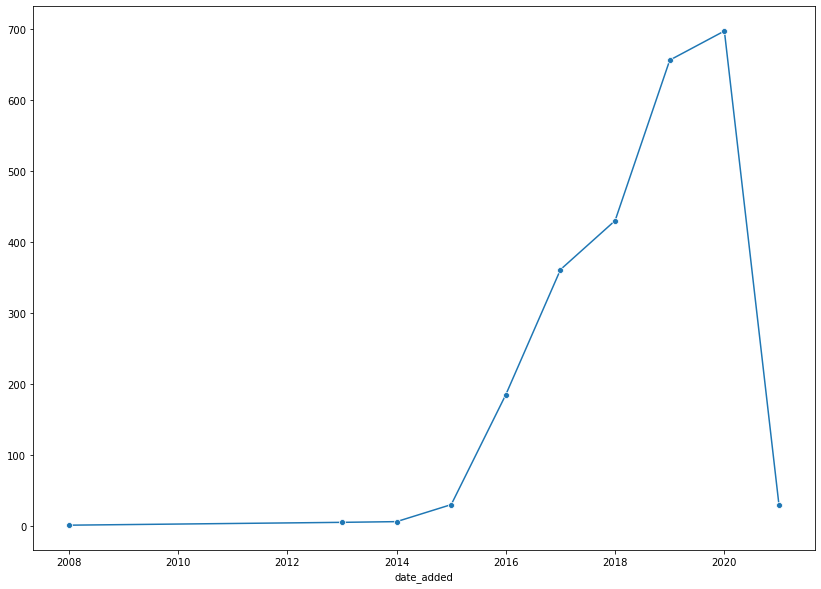

In [23]:
plt.figure(figsize = (14,10))
sns.lineplot(data = date_added_series,  x = "date_added" , y= date_added_series , marker="o")

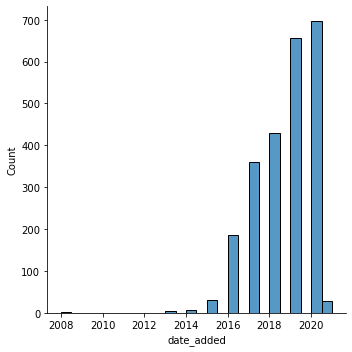

In [179]:
sns.displot(netflix_seriess, x="date_added",binwidth = 0.5)

# Pergunta:
## Qual o gênero de serie mais predominante no catálogo da netflix?

In [184]:
netflix_series["listed_in"].value_counts()[:5].index.tolist()

["Kids' TV",
 'International TV Shows, TV Dramas',
 'Crime TV Shows, International TV Shows, TV Dramas',
 "Kids' TV, TV Comedies",
 'International TV Shows, Romantic TV Shows, TV Dramas']

In [186]:
x = pd.DataFrame(netflix_series, columns= ["listed_in"])
generos = x.pivot_table(index=["listed_in"], aggfunc='size')
generos

listed_in
Anime Series                                             8
Anime Series, Crime TV Shows                             3
Anime Series, Crime TV Shows, International TV Shows     9
Anime Series, Crime TV Shows, TV Thrillers               1
Anime Series, International TV Shows                    75
                                                        ..
TV Horror, TV Mysteries, TV Thrillers                    4
TV Horror, TV Mysteries, Teen TV Shows                   1
TV Horror, Teen TV Shows                                 1
TV Sci-Fi & Fantasy, TV Thrillers                        1
TV Shows                                                12
Length: 227, dtype: int64

In [187]:
generos.sort_values(ascending = False)

listed_in
Kids' TV                                                  205
International TV Shows, TV Dramas                         111
Crime TV Shows, International TV Shows, TV Dramas         106
Kids' TV, TV Comedies                                      90
International TV Shows, Romantic TV Shows, TV Dramas       86
                                                         ... 
Crime TV Shows, TV Horror, TV Mysteries                     1
Docuseries, Kids' TV, Science & Nature TV                   1
Docuseries, Reality TV, Teen TV Shows                       1
Docuseries, Science & Nature TV, TV Action & Adventure      1
International TV Shows, Korean TV Shows, TV Horror          1
Length: 227, dtype: int64

#### Representação de quantas series um unico diretor produzio

In [188]:
x = pd.DataFrame(netflix_series, columns= ["director"])
top_directors = x.pivot_table(index=["director"], aggfunc='size')
top_directors

director
Adrien Lagier, Ousmane Ly               1
Ah Loong                                1
Ahmet Katıksız                          1
Alastair Fothergill                     3
Alejandro Hartmann                      1
                                       ..
Vijay S. Bhanushali                     1
Vikramaditya Motwane, Anurag Kashyap    1
Wouter Bouvijn                          1
Yasuhiro Irie                           1
Ziad Doueiri                            1
Length: 177, dtype: int64

In [189]:
top_directors.sort_values(ascending = False)

director
Alastair Fothergill          3
Ken Burns                    2
Rob Seidenglanz              2
Iginio Straffi               2
Shin Won-ho                  2
                            ..
Miguel Conde                 1
Mick Grogan                  1
Michel Tikhomiroff           1
Michael Simon                1
Adrien Lagier, Ousmane Ly    1
Length: 177, dtype: int64

### Top 3 diretores q mais produziram series, presentes no catalogo da netflix

In [191]:
netflix_series["director"].value_counts()[:3].index.tolist()

['Alastair Fothergill', 'Stan Lathan', 'Rob Seidenglanz']

### Representação de paises que tiveram produções de series.

In [192]:
x = pd.DataFrame(netflix_series, columns= ["country"])
top_country = x.pivot_table(index=["country"], aggfunc='size')
top_country

country
Argentina                                   16
Argentina, Spain                             1
Argentina, United States, Mexico             1
Australia                                   46
Australia, Canada                            1
                                            ..
United States, South Korea, China            2
United States, Sweden                        1
United States, United Kingdom                7
United States, United Kingdom, Australia     1
Uruguay, Germany                             1
Length: 183, dtype: int64

In [193]:
top_country.sort_values(ascending = False)

country
United States              705
United Kingdom             204
Japan                      157
South Korea                147
India                       71
                          ... 
Norway, Denmark              1
Norway, Germany, Sweden      1
Norway, Sweden               1
Norway, United States        1
Uruguay, Germany             1
Length: 183, dtype: int64

In [194]:
netflix_series["country"].value_counts()[:3].index.tolist()

['United States', 'United Kingdom', 'Japan']

### Representação de temporadas das series.

In [25]:
x = pd.DataFrame(netflix_series, columns= ["title","duration"])
directors_and_country = x.pivot_table(index=["duration"], aggfunc='size')
directors_and_country.sort_values(ascending = False)

duration
1 Season      1608
2 Seasons      382
3 Seasons      184
4 Seasons       87
5 Seasons       58
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       6
11 Seasons       3
15 Seasons       2
13 Seasons       2
12 Seasons       2
16 Seasons       1
dtype: int64

#### Nos queriamos fazer um grafico que representasse a duração mais predominante entre as series, mas tivemos um problema igual no do filme, que a coluna duration apresentava a palavra season do lado da quantidade de temporadas que cada serie possuia, então tivemos que remover ela. 

In [32]:
netflix_series["duration"]=netflix_series["duration"].str.replace(' Season','')
netflix_series["duration"]=netflix_series["duration"].astype(str).astype(int)

<ipython-input-32-5e957f4a786a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_series["duration"]=netflix_series["duration"].str.replace(' Season','')


ValueError: invalid literal for int() with base 10: '4s'

In [33]:
netflix_series["duration"]=netflix_series["duration"].str.replace('s','')
netflix_series["duration"]=netflix_series["duration"].astype(str).astype(int)

<ipython-input-33-29196b5df6b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_series["duration"]=netflix_series["duration"].str.replace('s','')
<ipython-input-33-29196b5df6b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_series["duration"]=netflix_series["duration"].astype(str).astype(int)


<AxesSubplot:xlabel='duration', ylabel='count'>

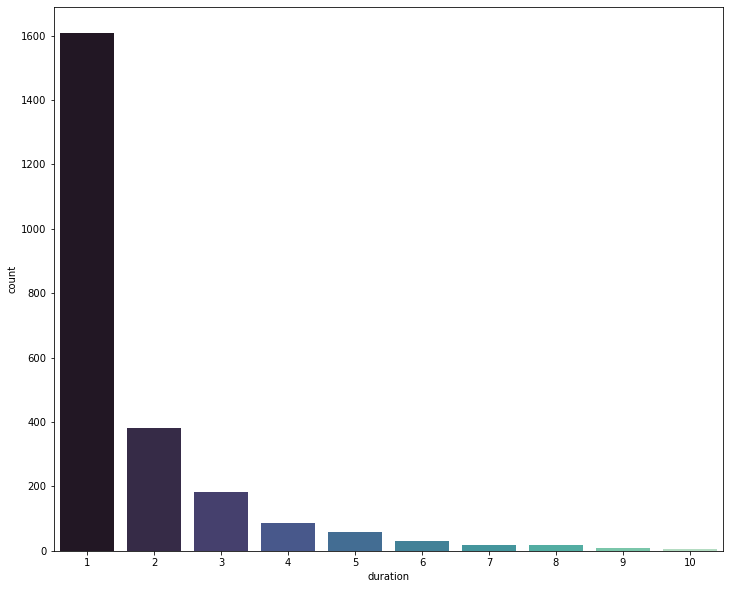

In [35]:
plt.figure(figsize = (12,10))
sns.countplot(x="duration", data=netflix_series, palette="mako", order=netflix_series["duration"].value_counts().index[0:10])

#### Fizemos esse gráfico para sabermos qual classificação de series é predominante no catalogo da netflix

<AxesSubplot:xlabel='rating', ylabel='count'>

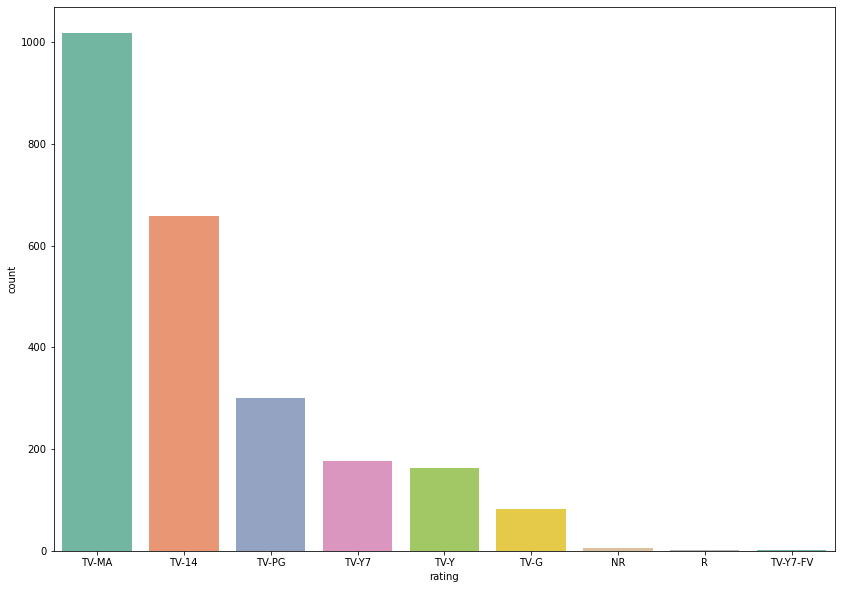

In [28]:
plt.figure(figsize = (14,10))
sns.countplot(x="rating", data=netflix_series, palette="Set2", order=netflix_series['rating'].value_counts().index[0:10])